# Imports

In [1]:
import xarray as xr
%matplotlib inline
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
# if xarray doesn't work, may need to upgrade it 

In [45]:
nc1 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc')
nc1

<xarray.Dataset>
Dimensions:             (column: 505972, gridcell: 21013, hist_interval: 2, landunit: 62100, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, nvegwcs: 4, pft: 800154, time: 1)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time                (time) object 2015-02-01 00:00:00
  * lon                 (lon) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * lat                 (lat) float32 -90.0 -89.057594 ... 89.057594 90.0
Dimensions without coordinates: column, gridcell, hist_interval, landunit, nvegwcs, pft
Data variables:
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds      

In [48]:
nc2 = xr.open_dataset('clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2100-12.nc')

# Analysis

In [ ]:
# count values per unique lat/lon index pair
max_length = 0
for i in range(1,289):
    for j in range(1,193): # should it be 193? in the metadata it says there's 192 values but there's only 186 unique values? 
        new_length = nc1.TSA.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size # count unique lat/lon index pairs 
        if new_length > max_length:
            max_length = new_length

print('Maximum total unique values per lat/lon pair =', max_length)

In [12]:
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==6)
tsa.transpose()[(nc1.pfts1d_ixy==101)&(nc1.pfts1d_jxy==1)].values.size

36

In [3]:
# find max pft for each unique lat/lon/lunit combo (VEGETATION/BARE SOIL) - if don't drop NaN values 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==1) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.transpose()[(nc1.pfts1d_ixy==i)&(nc1.pfts1d_jxy==j)].values.size
        #new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair w/o dropping NaN =", max_length)

Max values per unique lat/lon pair w/o dropping NaN = 51


In [7]:
# find max pft for each unique lat/lon/lunit combo (VEGETATION/BARE SOIL) - if drop NaN values 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==1) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print("Max values per unique lat/lon pair WITH dropping NaN =", max_length)

15


In [5]:
# find max pft for each unique lat/lon/lunit combo (CROP)
# DID DROP NAN VALUES 
max_length = 0
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==2) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# this is a mask so it has NaN values where the land unit is not the desired type 

# now loop through each latitude/longitude combo 
for i in range(1,289):
    for j in range(1,193):
        new_length = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values.size
        if new_length > max_length:
            max_length = new_length

print('Max values per lat/lon (crop):', max_length)

Max values per lat/lon (crop): 20


Game Plan 

Go through and create list of tsa values for each unique lat/lon pair for the land unit of interest 

Then initialize a cube with dimensions of lat x lon x max pft (for that land unit?)

Loop through the tsa list and fill in each value one by one into the previously created cube 

# Vegetation/Bare Soil 
Create cube with TSA values masked for pfts_lunit == 1 
Then drop(?????????????????) NaN values 
Fill into cube by lat/lon values --> fancy indexing 

Create cube with TSA weights for corresponding values 

In [30]:
tsa = nc1.TSA.squeeze()

In [27]:
tsa = tsa.where(nc1.pfts1d_itype_lunit==1)
print(tsa.max())
v = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values

<xarray.DataArray 'TSA' ()>
array(0.)
Coordinates:
    time     object 2015-02-01 00:00:00


In [53]:
tsa2 = nc2.TSA

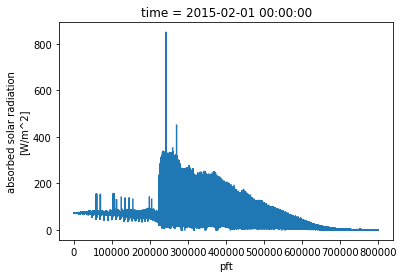

In [59]:
nc1.FSA.plot()

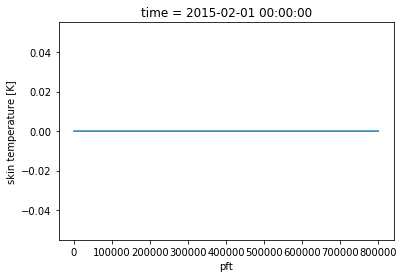

In [58]:
nc1.TSKIN.plot()

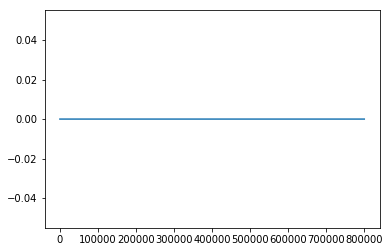

In [52]:
plt.plot(nc2.TSA.mean(dim='time'))

In [41]:
tsa = nc1.TSA.squeeze()
tsa = tsa.where(nc1.pfts1d_itype_lunit==9)
print(tsa.max())
# all of the values are 0?? @LEI

<xarray.DataArray 'TSA' ()>
array(0.)
Coordinates:
    time     object 2015-02-01 00:00:00


In [28]:
# Vegetation/Bare Soil - fill in TSA values 
# LEI 
tsa_cube = np.full((288,192,15), float("NaN")) 

tsa = nc1.TSA.squeeze()
tsa = tsa.where(nc1.pfts1d_itype_lunit==1) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 
# could I use tsa as a mask to get the weight values that I want? 

# v is temporary list of values that have the appropriate land unit and lat/lon desired
# didn't drop NaN values - unsure if this is right but I wanted to preserve the locations of the values? 
# check length of v first - see if it matches the z dimension of the cube 

for i in range(1,289): # because grabbing from pfts arrays, where the coordinates start from 1, not 0
    for j in range(1,193):
        v = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        for k in range(len(v)):
            print(v[k])
            #tsa_cube[i-1,j-1,k] = v[k]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


KeyboardInterrupt: 

In [17]:
v.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [ ]:
# Vegetation/Bare Soil - fill in TSA weights 
# LEI 
tsa_wtlunit_cube = np.full((288,192,15), float("NaN")) 

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==1).where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).where(tsa != np.nan).values
        #itype_lunit == 1 is for vegetation/bare soil
        for k in range(len(v)):
            tsa_wtlunit_cube[i-1,j-1,k] = v[k]

Next, make cubes for the weights of the land units 

Also, should maybe filter for only the points that are "active"? Am not exactly sure what "active" means 

# Understanding the Data

In [10]:
# print unique values and counts for longitude indices
unique, counts = np.unique(nc1.pfts1d_ixy, return_counts=True)
np.asarray((unique, counts)).T[-10:]

array([[ 279, 1748],
       [ 280, 1701],
       [ 281, 2070],
       [ 282, 2567],
       [ 283, 2541],
       [ 284, 2754],
       [ 285, 2918],
       [ 286, 2965],
       [ 287, 2960],
       [ 288, 2983]])

In [27]:
# print unique values and counts - longitude
unique, counts = np.unique(nc1.pfts1d_lon, return_counts=True)
np.asarray((unique, counts)).T[-10:]

array([[ 347.5 , 1748.  ],
       [ 348.75, 1701.  ],
       [ 350.  , 2070.  ],
       [ 351.25, 2567.  ],
       [ 352.5 , 2541.  ],
       [ 353.75, 2754.  ],
       [ 355.  , 2918.  ],
       [ 356.25, 2965.  ],
       [ 357.5 , 2960.  ],
       [ 358.75, 2983.  ]])

In [3]:
# print unique values and counts - j index (latitudes)
unique, counts = np.unique(nc1.pfts1d_jxy, return_counts=True)
np.asarray((unique, counts)).T[-10:]


array([[ 177, 4542],
       [ 178, 3909],
       [ 179, 3517],
       [ 180, 3774],
       [ 181, 3660],
       [ 182, 3802],
       [ 183, 3063],
       [ 184, 2405],
       [ 185, 1253],
       [ 186,   92]])

In [10]:
max(nc1.pfts1d_ixy)

KeyboardInterrupt: 

In [29]:
# print unique values and counts - latitude
unique, counts = np.unique(nc1.pfts1d_lat, return_counts=True)
np.asarray((unique, counts)).T[-10:]

array([[  75.86387435, 4542.        ],
       [  76.80628272, 3909.        ],
       [  77.7486911 , 3517.        ],
       [  78.69109948, 3774.        ],
       [  79.63350785, 3660.        ],
       [  80.57591623, 3802.        ],
       [  81.51832461, 3063.        ],
       [  82.46073298, 2405.        ],
       [  83.40314136, 1253.        ],
       [  84.34554974,   92.        ]])

In [19]:
# itype - land unit (use to filter for veg/crop/urban)
unique, counts = np.unique(nc1.pfts1d_itype_lunit, return_counts=True)
np.asarray((unique, counts)).T

array([[     1, 315195],
       [     2, 420260],
       [     4,  20378],
       [     5,   4690],
       [     6,    131],
       [     7,    720],
       [     8,  17580],
       [     9,  21200]])

In [23]:
# active grid cells 
unique, counts = np.unique(nc1.pfts1d_active, return_counts=True)
np.asarray((unique, counts)).T

array([[     0, 600385],
       [     1, 199769]])

In [9]:
# weight - land unit
unique, counts = np.unique(nc1.pfts1d_wtlunit, return_counts=True)
np.asarray((unique, counts)).T

array([[0.00000000e+00, 5.94397000e+05],
       [6.57499827e-12, 1.00000000e+00],
       [7.99977404e-12, 1.00000000e+00],
       ...,
       [1.00000000e+00, 9.74000000e+02],
       [1.00000000e+00, 4.90000000e+01],
       [1.00000000e+00, 1.10000000e+01]])

(array([688185.,  28357.,  14022.,   9671.,   7898.,   5732.,   6497.,
          3654.,   3654.,  32484.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

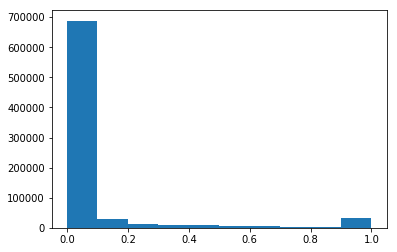

In [12]:
plt.hist(nc1.pfts1d_wtlunit)

# Old Code

In [22]:
# Set up empty data cubes 
lat = np.full((288,192,16), NaN)

In [18]:
lon = np.full((288,192,16), NaN)

In [19]:
pft = np.full((288,192,16), NaN)

<xarray.DataArray (pft: 3)>
array([1, 1, 1])
Dimensions without coordinates: pft

In [10]:
tsa = nc1.TSA.squeeze()
pfts1d_itype_lunit = nc1.pfts1d_itype_lunit
pfts1d_lat = nc1.pfts1d_lat
pfts1d_lon = nc1.pfts1d_lon
pfts1d_wtgcell = nc1.pfts1d_wtgcell

In [11]:
tsa

<xarray.DataArray 'TSA' (pft: 800154)>
[800154 values with dtype=float32]
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [12]:
# Extracting Rural TSA and corresponding lat/lon
rural_tsa = tsa[pfts1d_itype_lunit == 1]
rural_wt = pfts1d_wtgcell[pfts1d_itype_lunit == 1]
rural_lat = pfts1d_lat[pfts1d_itype_lunit == 1]
rural_lon = pfts1d_lon[pfts1d_itype_lunit == 1]

In [13]:
# Extracting Urban TSA and corresponding lat/lon
urban_tsa = tsa[pfts1d_itype_lunit > 6]
urban_lat = pfts1d_lat[pfts1d_itype_lunit > 6]
urban_lon = pfts1d_lon[pfts1d_itype_lunit > 6]

In [15]:
len(urban_lon)

39500

In [16]:
min(urban_tsa)

<xarray.DataArray 'TSA' ()>
array(235.46974, dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [17]:
max(urban_tsa)

<xarray.DataArray 'TSA' ()>
array(303.8749, dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [18]:
%matplotlib inline

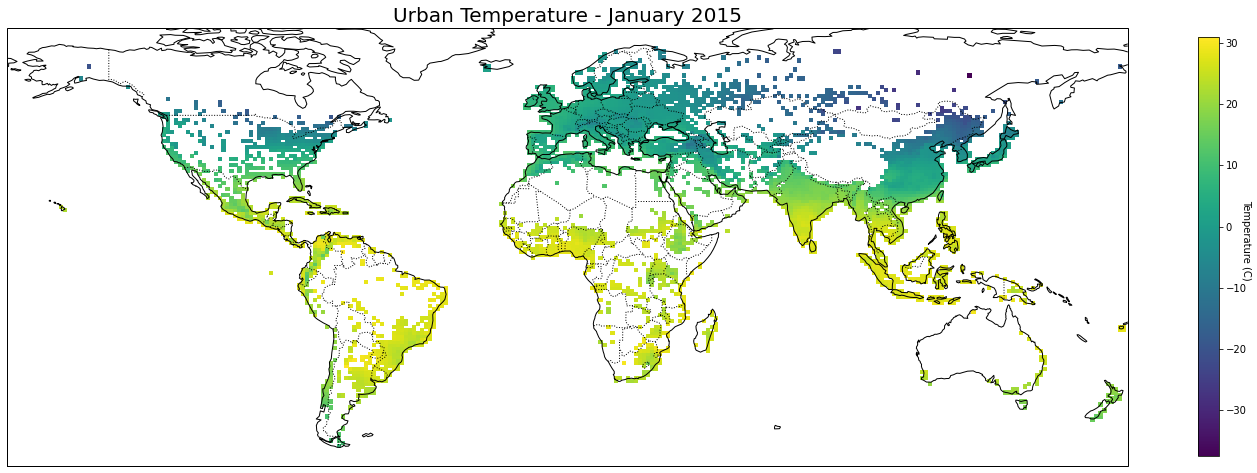

In [28]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(urban_lon, urban_lat, c=(urban_tsa-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Urban Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\Urban_Jan2015.jpg')


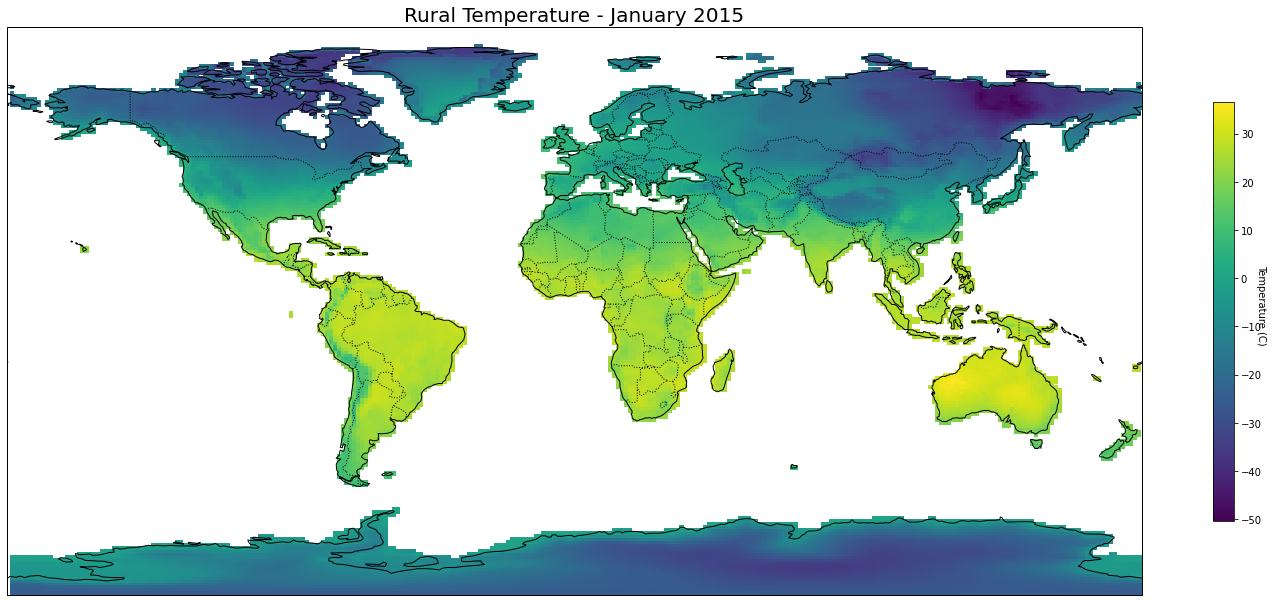

In [30]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(rural_lon, rural_lat, c=(rural_tsa-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Rural Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\Rural_Jan2015.jpg')


ValueError: arguments without labels along dimension 'pft' cannot be aligned because they have different dimension sizes: {315195, 39500}

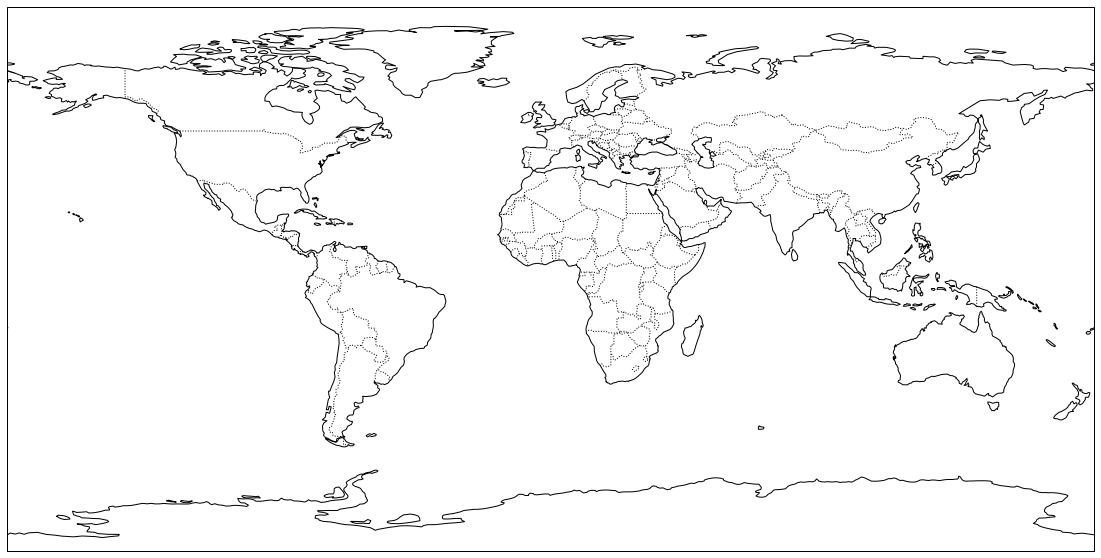

In [31]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(rural_lon, rural_lat, c=(urban_tsa - rural_tsa), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("UHI Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

# plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\UHI_Jan2015.jpg')


In [33]:
urban_tsa

<xarray.DataArray 'TSA' (pft: 39500)>
array([281.0757, 281.0757, 281.0757, ..., 263.9483, 263.9483, 263.9483],
      dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [18]:
wt_rural_tsa = rural_tsa * rural_wt

In [85]:
# maybe i have to make all of my arrays 2D? by reshaping or something? how to fill in missing points? 


## Old Code

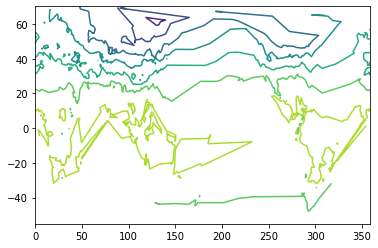

In [14]:
plt.tricontour(urban_lon, urban_lat, urban_tsa)

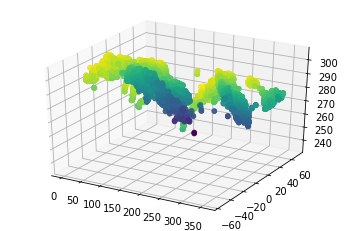

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = urban_tsa - 273
ax.scatter(urban_lon, urban_lat, urban_tsa, c=c)


In [163]:
#https://stackoverflow.com/questions/40465026/groupby-bins-on-two-variables

In [164]:
#https://stackoverflow.com/questions/15118939/fill-2d-numpy-array-from-three-1d-numpy-arrays

TypeError: Input z must be 2D, not 1D

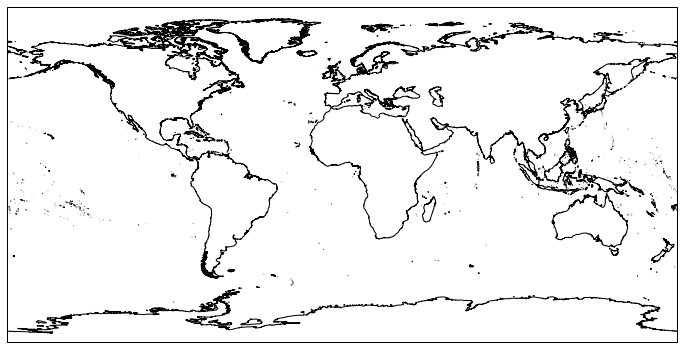

In [78]:
fig, ax = plt.subplots(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='10m')     
plt.contourf(urban_lon, urban_lat, urban_tsa, transform=ccrs.PlateCarree())  

In [53]:
# doesn't work 
a = np.full((39500, 39500), np.nan)
# array is too big 

MemoryError: 

In [50]:
tsa.attrs

{'long_name': '2m air temperature', 'units': 'K', 'cell_methods': 'time: mean'}

wrong - do not run
tsa.to_dataset(dim='pft')

In [84]:
# wrong 
xsize = len(np.unique(rural_lat.data))
ysize = len(np.unique(rural_lon.data))
print(xsize, ',', ysize)

"""Do not run
out = [rural_tsa[i] for i, (x,y) in enumerate(zip(rural_lat, rural_lon))]
out = np.asarray(out).reshape((xsize, ysize))'''

ValueError: cannot reshape array of size 315195 into shape (179,288)

In [39]:
del rural_tsa['time']

In [45]:
# wrong 
xr.merge([rural_tsa, rural_lon, rural_lat])

<xarray.Dataset>
Dimensions:     (pft: 315195)
Dimensions without coordinates: pft
Data variables:
    TSA         (pft) float32 ...
    pfts1d_lon  (pft) float64 ...
    pfts1d_lat  (pft) float64 ...

In [30]:
nc1.landfrac

<xarray.DataArray 'landfrac' (lat: 192, lon: 288)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
Attributes:
    long_name:  land fraction

In [27]:
rural = xr.concat([rural_lat, rural_lon], 'lat')

In [68]:
rural_tsa = rural_tsa.expand_dims('lon')
rural_tsa

<xarray.DataArray 'TSA' (lon: 1, lat: 1, pft: 315195)>
array([[[247.17212,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Dimensions without coordinates: lon, lat, pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [17]:
empty = []
var = 0
for i in range(1,200):
    if (rural_lat[i] == rural_lat[i-1]) and (rural_lon[i] == rural_lon[i-1]):
        var += wt_rural_tsa
    else: 
        empty.append(var)
        var = 0

NameError: name 'wt_rural_tsa' is not defined

In [162]:
empty = []
var = 0
rural_lat = [1,1,1,2,3,4,5,9,9,9,9,9]
rural_lon = [1,1,2,2,3,4,6,1,2,5,4,4]
wt_rural_tsa = [0.1,0.05,0.5,0.22,0.31,.5,.4,.3,.1,.2,.3,.1]
for i in range(1,len(rural_lat)):
    if (rural_lat[i] == rural_lat[i-1]) and (rural_lon[i] == rural_lon[i-1]):
        print(wt_rural_tsa[i-1])
        var += wt_rural_tsa[i-1]
    else: 
        empty.append(var)
        var = 0

0.1
y
0.3
y


In [79]:
# wrong 
out = xr.vstack((rural_lat, rural_lon, rural_tsa))

AttributeError: module 'xarray' has no attribute 'vstack'

In [131]:
tsa[[0, 1, 2, 223925, 223926, 223927, 738172, 800120, 800152, 800153]]

<xarray.DataArray 'TSA' (pft: 10)>
array([247.17212,       nan,       nan, 281.0757 , 281.0757 , 281.0757 ,
       263.9483 ,       nan, 233.28204, 228.7623 ], dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [106]:
rural_tsa = tsa[pfts1d_itype_lunit == 1]
print(rural_tsa)

<xarray.DataArray 'TSA' (pft: 315195)>
array([247.17212,       nan,       nan, ...,       nan,       nan,       nan],
      dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean


In [96]:
(pfts1d_itype_lunit > 6).sum()

<xarray.DataArray 'pfts1d_itype_lunit' ()>
array(39500)

In [113]:
print(np.where(pfts1d_itype_lunit > 6))
pfts1d_itype_lunit > 6

(array([223925, 223926, 223927, ..., 738172, 738173, 738174], dtype=int64),)


<xarray.DataArray 'pfts1d_itype_lunit' (pft: 800154)>
array([False, False, False, ..., False, False, False])
Dimensions without coordinates: pft

In [42]:
#tsa = xr.DataArray(nc1['TSA'].squeeze(), dims="pft", coords = {'pft': [nc1.pfts1d_lat, nc1.pfts1d_lon]})

In [114]:
print(np.where(pfts1d_itype_lunit == 1))
pfts1d_itype_lunit == 1

(array([     0,      1,      2, ..., 800120, 800121, 800122], dtype=int64),)


<xarray.DataArray 'pfts1d_itype_lunit' (pft: 800154)>
array([ True,  True,  True, ..., False, False, False])
Dimensions without coordinates: pft

In [8]:
TSA = xr.DataArray(nc1.TSA, dims=['lon', 'lat', 'pfts1d_itype_lunit'], 
                  coords={'lon': nc1.lon, 'lat': nc1.lat, 
                          'pfts1d_itype_lunit': nc1.pfts1d_itype_lunit})

AttributeError: 'Dataset' object has no attribute 'f'

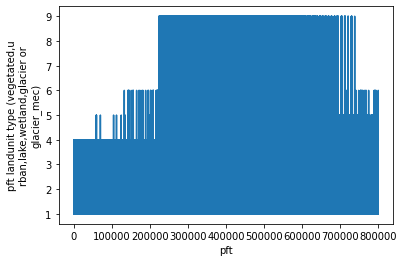

In [34]:
nc1.pfts1d_itype_lunit.plot()

In [12]:
nc1.landunit

<xarray.DataArray 'landunit' (landunit: 62100)>
array([    0,     1,     2, ..., 62097, 62098, 62099], dtype=int64)
Dimensions without coordinates: landunit

In [35]:
nc1.land1d_lon

<xarray.DataArray 'land1d_lon' (landunit: 62100)>
array([  0.,   0.,   0., ..., 330., 330., 330.])
Dimensions without coordinates: landunit
Attributes:
    long_name:  landunit longitude
    units:      degrees_east

In [15]:
nc1.land1d_lat

<xarray.DataArray 'land1d_lat' (landunit: 62100)>
array([-90.     , -90.     , -90.     , ...,  84.34555,  84.34555,  84.34555])
Dimensions without coordinates: landunit
Attributes:
    long_name:  landunit latitude
    units:      degrees_north

In [24]:
nc1.pft

<xarray.DataArray 'pft' (pft: 800154)>
array([     0,      1,      2, ..., 800151, 800152, 800153], dtype=int64)
Dimensions without coordinates: pft

In [23]:
tsa

<xarray.DataArray 'TSA' (time: 1, pft: 800154)>
[800154 values with dtype=float32]
Coordinates:
  * time     (time) object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [22]:
tsa = nc1.TSA

In [9]:
tsa1 = nc1.TSA
#tsa1.set_coords(lon,lat)

AttributeError: 'DataArray' object has no attribute 'set_coords'

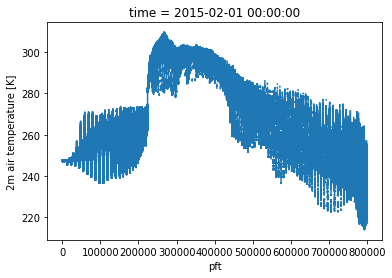

In [11]:
# find some way to add in latitude/longitude data?
""" possible candidates:
grid1d_lat: gridcell latitude
land1d_ityplunit: landunit type(vegetated, urban, lake, wetland, glacier or glacier mec)
^^ am not sure if this is a categorical variable or if they converted it into numbers though?? ex. 0=vegetated, 1=land
land1d_ixy: 2d longitude index of corresponding landunit 
land1d_lat: landunit latitude 
land1d_wtgcell: landunit weight relative to corresponding gridcell 
what is pft??? important or nah 
ltype vs. ctype
"""
tsa1.plot()

In [13]:
"""fig, axes = plt.subplots(figsize=(20,10))
        
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
ax.set_global()
ax.add_feature(cfeature.BORDERS, linestyle=':') # NEW 
ax.coastlines()

(nc['TSA_U']-nc['TSA_R']).squeeze().plot(transform=ccrs.PlateCarree(), cmap='seismic', vmin=-3.5, vmax=3.5)

plt.title("TSA UHI - Jan 2010", size=20);
"""

'fig, axes = plt.subplots(figsize=(20,10))\n        \nax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))\nax.set_global()\nax.add_feature(cfeature.BORDERS, linestyle=\':\') # NEW \nax.coastlines()\n\n(nc[\'TSA_U\']-nc[\'TSA_R\']).squeeze().plot(transform=ccrs.PlateCarree(), cmap=\'seismic\', vmin=-3.5, vmax=3.5)\n\nplt.title("TSA UHI - Jan 2010", size=20);\n'

In [19]:
nc0 = xr.open_dataset('Practice_3.26.2020\DJF\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h0.2015-01.nc')

In [20]:
nc0

<xarray.Dataset>
Dimensions:                          (hist_interval: 2, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 288, ltype: 9, nvegwcs: 4, time: 1)
Coordinates:
  * levgrnd                          (levgrnd) float32 0.01 0.04 ... 41.998436
  * levlak                           (levlak) float32 0.05 0.6 ... 34.325 44.775
  * levdcmp                          (levdcmp) float32 0.01 0.04 ... 41.998436
  * time                             (time) object 2015-02-01 00:00:00
  * lon                              (lon) float32 0.0 1.25 2.5 ... 357.5 358.75
  * lat                              (lat) float32 -90.0 -89.057594 ... 90.0
Dimensions without coordinates: hist_interval, levsoi, ltype, nvegwcs
Data variables:
    mcdate                           (time) int32 ...
    mcsec                            (time) int32 ...
    mdcur                            (time) int32 ...
    mscur                            (time) int32 ...
    nstep                            (time) int32 ...
    time_bounds                      (time, hist_interval) object ...
    date_written                     (time) |S16 ...
    time_written                     (time) |S16 ...
    area                             (lat, lon) float32 ...
    landfrac                         (lat, lon) float32 ...
    landmask                         (lat, lon) float64 ...
    pftmask                          (lat, lon) float64 ...
    nbedrock                         (lat, lon) float64 ...
    ZSOI                             (levgrnd, lat, lon) float32 ...
    DZSOI                            (levgrnd, lat, lon) float32 ...
    WATSAT                           (levgrnd, lat, lon) float32 ...
    SUCSAT                           (levgrnd, lat, lon) float32 ...
    BSW                              (levgrnd, lat, lon) float32 ...
    HKSAT                            (levgrnd, lat, lon) float32 ...
    ZLAKE                            (levlak, lat, lon) float32 ...
    DZLAKE                           (levlak, lat, lon) float32 ...
    ACTUAL_IMMOB                     (time, lat, lon) float32 ...
    AGNPP                            (time, lat, lon) float32 ...
    ALT                              (time, lat, lon) float32 ...
    ALTMAX                           (time, lat, lon) float32 ...
    AR                               (time, lat, lon) float32 ...
    ATM_TOPO                         (time, lat, lon) float32 ...
    BAF_CROP                         (time, lat, lon) float32 ...
    BAF_PEATF                        (time, lat, lon) float32 ...
    BCDEP                            (time, lat, lon) float32 ...
    BGNPP                            (time, lat, lon) float32 ...
    BTRAN2                           (time, lat, lon) float32 ...
    BTRANMN                          (time, lat, lon) float32 ...
    C13_AR                           (time, lat, lon) float32 ...
    C13_GPP                          (time, lat, lon) float32 ...
    C13_HR                           (time, lat, lon) float32 ...
    C13_NBP                          (time, lat, lon) float32 ...
    C13_TOTECOSYSC                   (time, lat, lon) float32 ...
    C13_TOTLITC                      (time, lat, lon) float32 ...
    C13_TOTSOMC                      (time, lat, lon) float32 ...
    C13_TOTVEGC                      (time, lat, lon) float32 ...
    C14_AR                           (time, lat, lon) float32 ...
    C14_GPP                          (time, lat, lon) float32 ...
    C14_HR                           (time, lat, lon) float32 ...
    C14_NBP                          (time, lat, lon) float32 ...
    C14_TOTECOSYSC                   (time, lat, lon) float32 ...
    C14_TOTLITC                      (time, lat, lon) float32 ...
    C14_TOTSOMC                      (time, lat, lon) float32 ...
    C14_TOTVEGC                      (time, lat, lon) float32 ...
    CH4PROD                          (time, lat, lon) float32 ...
    CH4_SURF_AERE_SAT                (time, lat, 